# Descriptive Analytics

## Temporal Demand Patterns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from IPython.display import display, HTML
display(HTML(""))
import scienceplots
plt.style.use(['science', 'no-latex'])

In [2]:
[# import prepared data set
df_la = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time"],low_memory=False)

## Data Overview

In [3]:
df_la.head(1)

,Unnamed: 0,start_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,Date,Weekday,Hour,Month
0,0,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,2019-01-01,1,0,1


In [6]:
# types of users
user = df_la["user_type"].unique()
print(user)

['Walk-up' 'Monthly Pass' 'Annual Pass' 'One Day Pass' 'Flex Pass'
 'Testing']


## Usage During a Day

In [4]:
# number of rides per hour of a day
rides_day = np.zeros(24)
for i in range(24):
    rides_day[i] = df_la[df_la['Hour']==i].size
    
time = pd.DataFrame({'Time_Period': range(24), 'Rides': rides_day})
time.head()

,Time_Period,Rides
0,0,41510.0
1,1,24024.0
2,2,15932.0
3,3,6566.0
4,4,8484.0


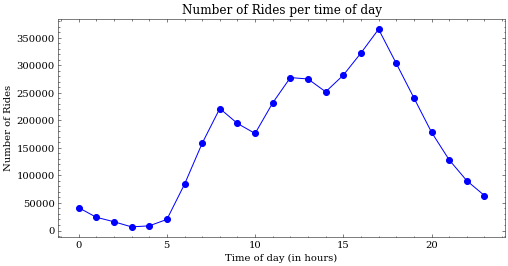

In [5]:
# hourly demand
plt.figure(figsize=(8,4))
plt.plot(time['Time_Period'],time['Rides'],'o-', color='blue')
plt.xlabel("Time of day (in hours)")
plt.ylabel("Number of Rides")
plt.title("Number of Rides per time of day")
plt.show()

## Usage During a Week

In [6]:
weekdays =['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_week=np.zeros(7)
for i in range(7):
    rides_week[i] = df_la[df_la["Weekday"]==i].size
    
weekdaysize = pd.DataFrame({'Weekday': weekdays, 'Rides': rides_week})
weekdaysize

,Weekday,Rides
0,Monday,572390.0
1,Tuesday,617442.0
2,Wednesday,572978.0
3,Thursday,598108.0
4,Friday,621194.0
5,Saturday,486598.0
6,Sunday,495180.0


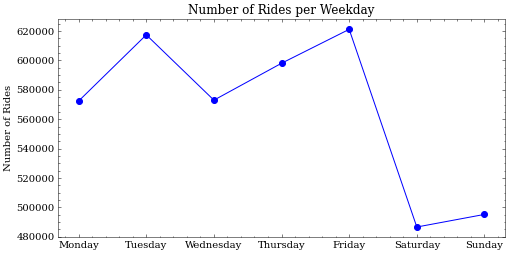

In [8]:
# weekly demand
plt.figure(figsize=(8,4))
plt.plot(weekdaysize["Weekday"], weekdaysize["Rides"],'o-', color='blue')
plt.ylabel("Number of Rides")
plt.title("Number of Rides per Weekday")
plt.show()

## Usage During a Year

In [9]:
months=["January","February","March","April","May","June","July","August","September","Oktober","November","December"]


In [11]:
rides_month = np.zeros(12)
for i in range(12):
    rides_month[i]= df_la[df_la["Month"]==i+1].size

year= pd.DataFrame({'Months':months, 'Rides':rides_month})
year

,Months,Rides
0,January,268786.0
1,February,233464.0
2,March,285306.0
3,April,256998.0
4,May,258972.0
5,June,367318.0
6,July,389102.0
7,August,445172.0
8,September,418656.0
9,Oktober,410634.0


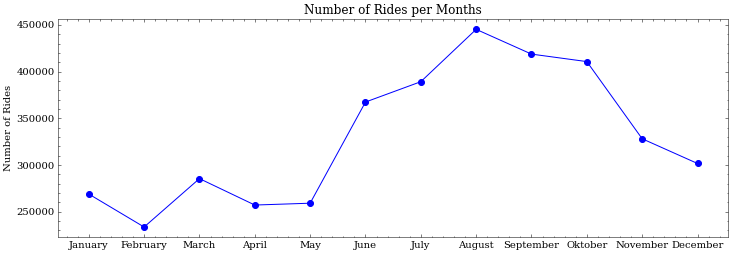

In [12]:
# yearly demand
plt.figure(figsize=(12,4))
plt.plot(year["Months"], year["Rides"],'o-', color='blue')
plt.ylabel("Number of Rides")
plt.title("Number of Rides per Months")
plt.show()

## Seasonal Comparison
- Spring: March-May
- Summer: June-August
- Fall: September-November
- Winter: December-February

In [14]:
season =['Spring','Summer','Fall','Winter']
spring = df_la[(df_la["Month"]>=3) & (df_la["Month"]<=5)]
summer = df_la[(df_la["Month"]>=6)&(df_la["Month"]<=8)]
fall = df_la[(df_la["Month"]>=9)&(df_la["Month"]<=11)]
winter = df_la[(df_la["Month"]==12) | (df_la["Month"]<=2)]

In [15]:
season = pd.DataFrame({'Season':season, 'Rides': [spring.size, summer.size, fall.size, winter.size]})
season

,Season,Rides
0,Spring,801276
1,Summer,1201592
2,Fall,1157268
3,Winter,803754


In [16]:
rides_week_spring = np.zeros(7)
rides_week_summer = np.zeros(7)
rides_week_fall = np.zeros(7)
rides_week_winter = np.zeros(7)
for i in range(7):
    rides_week_spring[i] = spring[spring["Weekday"]==i].size
    rides_week_summer[i] = summer[summer["Weekday"]==i].size
    rides_week_fall[i] = fall[fall["Weekday"]==i].size
    rides_week_winter[i] = winter[winter["Weekday"]==i].size
    
season_2 = pd.DataFrame({'Weekday': weekdays, 'Spring': rides_week_spring, 'Summer': rides_week_summer, 'Fall': rides_week_fall, 'Winter': rides_week_winter})
season_2

,Weekday,Spring,Summer,Fall,Winter
0,Monday,119896.0,171024.0,171570.0,109900.0
1,Tuesday,118706.0,183792.0,178710.0,136234.0
2,Wednesday,115710.0,174678.0,168910.0,113680.0
3,Thursday,119364.0,184926.0,168056.0,125762.0
4,Friday,132804.0,180880.0,174356.0,133154.0
5,Saturday,95886.0,158522.0,135716.0,96474.0
6,Sunday,98910.0,147770.0,159950.0,88550.0


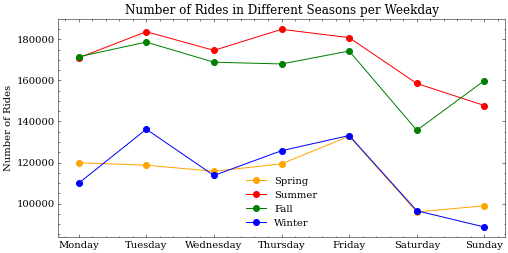

In [17]:
# demand per season
plt.figure(figsize=(8,4))
plt.plot(season_2["Weekday"], season_2["Spring"],'o-', color='orange', label = 'Spring')
plt.plot(season_2["Weekday"], season_2["Summer"],'o-', color='red', label = 'Summer')
plt.plot(season_2["Weekday"], season_2["Fall"],'o-', color='green', label = 'Fall')
plt.plot(season_2["Weekday"], season_2["Winter"],'o-', color='blue', label = 'Winter')
plt.ylabel("Number of Rides")
plt.title("Number of Rides in Different Seasons per Weekday")
plt.legend()
plt.show()